In [1]:
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import matplotlib.image as mpimg

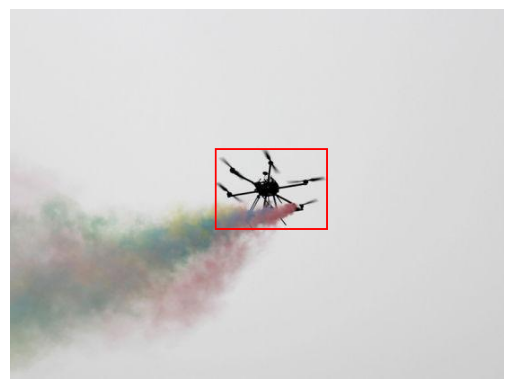

In [6]:


def draw_bbox(image_path, annotation_path):
    # Parse the annotation XML file
    tree = ET.parse(annotation_path)
    root = tree.getroot()

    # Get the bounding box coordinates
    bbox = root.find('object').find('bndbox')
    xmin = int(bbox.find('xmin').text)
    ymin = int(bbox.find('ymin').text)
    xmax = int(bbox.find('xmax').text)
    ymax = int(bbox.find('ymax').text)

    # Open the image
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # Draw the bounding box
    draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=2)

    plt.figure()
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Optionally, save the image with bbox
    image.save('output_with_bbox.jpg')

# Example usage
image_path = '/mnt/DATA/dronetracking/Abhin/segement&detect/detection_dataset/train/img/00001.jpg'
annotation_path = '/mnt/DATA/dronetracking/Abhin/segement&detect/detection_dataset/train/xml/00001.xml'  # Update with the actual path to your XML file
draw_bbox(image_path, annotation_path)


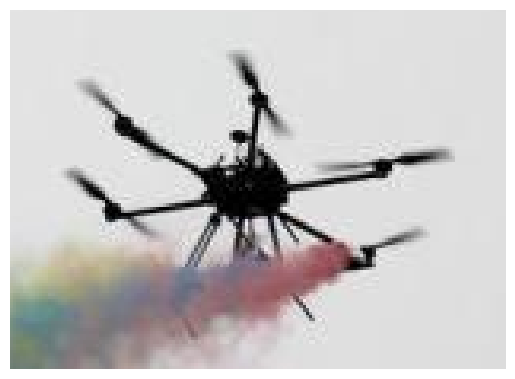

In [18]:
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def draw_bbox(image_path, annotation_path):
    # Parse the annotation XML file
    tree = ET.parse(annotation_path)
    root = tree.getroot()

    # Get the bounding box coordinates
    bbox = root.find('object').find('bndbox')
    xmin = int(bbox.find('xmin').text)
    ymin = int(bbox.find('ymin').text)
    xmax = int(bbox.find('xmax').text)
    ymax = int(bbox.find('ymax').text)

    # Open the image
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    # # Draw the original bounding box
    # draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=2)

    # Parse the bounding box coordinates
    x, y, w, h = xmin, ymin, xmax - xmin, ymax - ymin
    
    # Calculate the extended cropping coordinates using the provided logic
    y_min = int(y - (h / 8))
    y_max = int(y + h + (h / 8))
    x_min = int(x - (w / 8))
    x_max = int(x + w + (w / 8))
    
    # Ensure the coordinates are within the image bounds
    y_min = max(0, y_min)
    y_max = min(image.height, y_max)
    x_min = max(0, x_min)
    x_max = min(image.width, x_max)
    
    # Crop the image
    image_c = image.crop((x_min, y_min, x_max, y_max))

    # Display the cropped image
    plt.figure()
    plt.imshow(image_c)
    plt.axis('off')
    plt.show()

    # Optionally, save the cropped image
    image_c.save('output_cropped_bbox.jpg')

# Example usage
image_path = '/mnt/DATA/dronetracking/Abhin/segement&detect/detection_dataset/train/img/00001.jpg'
annotation_path = '/mnt/DATA/dronetracking/Abhin/segement&detect/detection_dataset/train/xml/00001.xml'
draw_bbox(image_path, annotation_path)


In [5]:
import os
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def apply_extended_crop(image_path, annotation_path):
    # Open the image
    image = Image.open(image_path)
    image_width, image_height = image.size

    try:
        # Parse the annotation XML file
        tree = ET.parse(annotation_path)
        root = tree.getroot()

        # Get the bounding box coordinates
        bbox = root.find('object').find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)

        # Calculate the extended cropping coordinates using the provided logic
        x, y, w, h = xmin, ymin, xmax - xmin, ymax - ymin
        y_min = int(y - (h / 4))
        y_max = int(y + h + (h / 4))
        x_min = int(x - (w / 4))
        x_max = int(x + w + (w / 4))

        # Ensure the coordinates are within the image bounds
        y_min = max(0, y_min)
        y_max = min(image_height, y_max)
        x_min = max(0, x_min)
        x_max = min(image_width, x_max)

        # Ensure the cropping coordinates are valid
        if x_min >= x_max or y_min >= y_max:
            raise ValueError("Cropping coordinates result in an invalid region")

        # Crop the image
        cropped_image = image.crop((x_min, y_min, x_max, y_max))

        return cropped_image

    except AttributeError:
        # Log the filename if the expected XML structure is not found
        with open('error_log.txt', 'a') as f:
            f.write(f"Error processing {image_path}: 'object' tag not found\n")
        return None
    except ValueError as ve:
        # Handle invalid cropping coordinates
        with open('error_log.txt', 'a') as f:
            f.write(f"Error processing {image_path}: {str(ve)}\n")
        return None
    except Exception as e:
        # Handle other exceptions gracefully if needed
        with open('error_log.txt', 'a') as f:
            f.write(f"Error processing {image_path}: {str(e)}\n")
        return None

def process_images(image_dir, annotation_dir, output_dir):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Get sorted list of files in image directory
    image_files = sorted(os.listdir(image_dir))

    # Process each image and annotation in sorted order
    for filename in image_files:
        if filename.endswith('.jpg'):
            image_path = os.path.join(image_dir, filename)
            annotation_path = os.path.join(annotation_dir, filename[:-4] + '.xml')  # Assuming XML files have the same base name

            # Apply extended crop
            cropped_image = apply_extended_crop(image_path, annotation_path)

            if cropped_image:
                # Save the cropped image
                output_path = os.path.join(output_dir, filename)
                cropped_image.save(output_path)
                print(f"Cropped image saved: {output_path}")

# Example usage
image_dir = '/mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/val/img'
annotation_dir = '/mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/val/xml'
output_dir = '/mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/val/croped_imgs'

process_images(image_dir, annotation_dir, output_dir)


Cropped image saved: /mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/val/croped_imgs/00001.jpg
Cropped image saved: /mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/val/croped_imgs/00002.jpg
Cropped image saved: /mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/val/croped_imgs/00003.jpg
Cropped image saved: /mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/val/croped_imgs/00004.jpg
Cropped image saved: /mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/val/croped_imgs/00005.jpg
Cropped image saved: /mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/val/croped_imgs/00006.jpg
Cropped image saved: /mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/val/croped_imgs/00007.jpg
Cropped image saved: /mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/val/croped_imgs/00008.jpg
Cropped image saved: /mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/val/croped_imgs/00009.jpg
Cropped image saved: /mnt/DATA/dronet

In [1]:
import os

# Define the directory path you want to enter
directory_path = "/mnt/DATA/dronetracking/Abhin/U-2-Net"

# Use the os.chdir() function to change the current working directory
os.chdir(directory_path)
current_directory = os.getcwd()
print("Current Directory:", current_directory)


Current Directory: /mnt/DATA/dronetracking/Abhin/U-2-Net


In [2]:
!python /mnt/DATA/dronetracking/Abhin/U-2-Net/u2net_test.py

['/mnt/DATA/dronetracking/Abhin/segement&detect/drone_detection_icpr_new/val/cropped/V_DRONE_1061_223.png']
...load U2NET---173.6 MB
Inferencing: V_DRONE_1061_223.png
/home/ee22m215/anaconda3/envs/segdrone/lib/python3.8/site-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/ee22m215/anaconda3/envs/segdrone/lib/python3.8/site-packages/torch/nn/functional.py:2970: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "
/home/ee22m215/anaconda3/envs/segdrone/lib/python3.8/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmo

In [10]:
import os
import xml.etree.ElementTree as ET
import numpy as np
from PIL import Image

def create_original_sized_mask(cropped_mask, original_image_path, extended_coords, output_path):
    # Open the original image to get its dimensions
    original_image = Image.open(original_image_path)
    original_width, original_height = original_image.size

    # Create a full zero mask with the original image dimensions
    original_mask = Image.new('L', (original_width, original_height), 0)  # 'L' mode for single channel (grayscale)

    # Ensure the cropped mask is single-channel
    if cropped_mask.mode != 'L':
        cropped_mask = cropped_mask.convert('L')

    # Convert images to numpy arrays
    cropped_mask_array = np.array(cropped_mask)
    original_mask_array = np.array(original_mask)

    y_min, y_max, x_min, x_max = extended_coords

    # Ensure the mask is placed within the bounds of the original mask
    original_mask_array[y_min:y_max, x_min:x_max] = cropped_mask_array

    # Convert the array back to an image
    original_mask = Image.fromarray(original_mask_array)

    # Save the mask
    original_mask.save(output_path)

def get_extended_coordinates(annotation_path, image_width, image_height):
    try:
        # Parse the annotation XML file
        tree = ET.parse(annotation_path)
        root = tree.getroot()

        # Get the bounding box coordinates
        bbox = root.find('object').find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)

        # Calculate the extended cropping coordinates using the provided logic
        x, y, w, h = xmin, ymin, xmax - xmin, ymax - ymin
        y_min = int(y - (h / 4))
        y_max = int(y + h + (h / 4))
        x_min = int(x - (w / 4))
        x_max = int(x + w + (w / 4))

        # Ensure the coordinates are within the image bounds
        y_min = max(0, y_min)
        y_max = min(image_height, y_max)
        x_min = max(0, x_min)
        x_max = min(image_width, x_max)

        return y_min, y_max, x_min, x_max

    except AttributeError:
        # Log the filename if the expected XML structure is not found
        with open('error_log.txt', 'a') as f:
            f.write(f"Error processing {annotation_path}: 'object' tag not found\n")
        return None
    except Exception as e:
        # Handle other exceptions gracefully if needed
        with open('error_log.txt', 'a') as f:
            f.write(f"Error processing {annotation_path}: {str(e)}\n")
        return None

def process_images(image_dir, annotation_dir, cropped_mask_dir, output_dir):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Get sorted list of files in annotation directory
    annotation_files = sorted(os.listdir(annotation_dir))

    # Process each annotation file
    for annotation_filename in annotation_files:
        if annotation_filename.endswith('.xml'):
            base_name = annotation_filename[:-4]
            image_path = os.path.join(image_dir, base_name + '.jpg')
            annotation_path = os.path.join(annotation_dir, annotation_filename)
            cropped_mask_path = os.path.join(cropped_mask_dir, 'croped_mask' + base_name + '.png')  # Adjusted mask filename

            if not os.path.exists(image_path) or not os.path.exists(cropped_mask_path):
                print(f"Missing corresponding image or mask for {annotation_filename}")
                continue

            # Open the original image to get its dimensions
            original_image = Image.open(image_path)
            original_width, original_height = original_image.size

            # Get the extended coordinates
            extended_coords = get_extended_coordinates(annotation_path, original_width, original_height)

            if extended_coords:
                # Load the cropped mask
                cropped_mask = Image.open(cropped_mask_path)

                # Create and save the original-sized mask
                output_path = os.path.join(output_dir, base_name + '_original_size_mask.png')
                create_original_sized_mask(cropped_mask, image_path, extended_coords, output_path)
                print(f"Original-sized mask saved: {output_path}")

image_dir = '/mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/test/img'
annotation_dir = '/mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/test/xml'
cropped_mask_dir = '/mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/test/mask_polygon/croped_mask'
output_dir = '/mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/test/mask_polygon/original_sized_mask'

process_images(image_dir, annotation_dir, cropped_mask_dir, output_dir)


Original-sized mask saved: /mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/test/mask_polygon/original_sized_mask/00001_original_size_mask.png
Original-sized mask saved: /mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/test/mask_polygon/original_sized_mask/00002_original_size_mask.png
Original-sized mask saved: /mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/test/mask_polygon/original_sized_mask/00003_original_size_mask.png
Original-sized mask saved: /mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/test/mask_polygon/original_sized_mask/00004_original_size_mask.png
Original-sized mask saved: /mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/test/mask_polygon/original_sized_mask/00005_original_size_mask.png
Original-sized mask saved: /mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/test/mask_polygon/original_sized_mask/00006_original_size_mask.png
Original-sized mask saved: /mnt/DATA/dronetracking/Abhin/segement&detect/det

In [1]:
import os
import numpy as np
import cv2
from shapely.geometry import Polygon

def mask_to_polygons(mask):
    '''
    Convierte una máscara de imagen en polígonos. Devuelve una lista de polígonos de shapely.
    
    Args:
        mask (numpy array): Máscara en escala de grises.
    '''
    
    # Calcula los contornos 
    mask = mask.astype(bool)
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Convertimos los contornos a polígonos de shapely
    polygons = []
    normalized_polygons = []
    for contour in contours:
        try:
            polygon = contour.reshape(-1, 2).tolist()
            normalized_polygon = [[round(coord[0] / mask.shape[1] , 4), round(coord[1] / mask.shape[0] , 4)] for coord in polygon]
        
            # Convertimos a objeto polígono de shapely
            polygon_shapely = Polygon(polygon)
            simplified_polygon = polygon_shapely.simplify(0.85, preserve_topology=True)
            polygons.append(simplified_polygon)

            normalized_polygons.append(Polygon(normalized_polygon))
        except Exception as e:
            pass

    return normalized_polygons

def process_masks_in_folder(mask_folder, output_folder):
    '''
    Procesa todas las máscaras en una carpeta y crea un archivo de texto para cada imagen con los polígonos.
    
    Args:
        mask_folder (str): Ruta a la carpeta de máscaras.
        output_folder (str): Ruta a la carpeta donde se guardarán los archivos de texto.
    '''
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for mask_filename in os.listdir(mask_folder):
        if not mask_filename.endswith('.png'):
            continue

        mask_path = os.path.join(mask_folder, mask_filename)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        polygons = mask_to_polygons(mask)
        
        # Assuming the output filename should follow the pattern without the '_original_size_mask' suffix
        output_filename = mask_filename.replace('_original_size_mask', '').replace('.png', '.txt')
        output_path = os.path.join(output_folder, output_filename)
        
        with open(output_path, 'w') as f:
            for poly in polygons:
                f.write('0 ' + ' '.join(f"{int(coord[0])} {int(coord[1])}" for coord in poly.exterior.coords[:-1]) + '\n')

# Rutas a las carpetas
mask_folder = '/mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/train/mask_polygon/original_sized_mask'
output_folder = '/mnt/DATA/dronetracking/Abhin/segement&detect/detection_DUT/train/mask_polygon/norm_polygons'

process_masks_in_folder(mask_folder, output_folder)
